In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

                                      0
0    'Multiple Streetlight Issue', 3822
1     'Single Streetlight Issue', 11463
2          'Homeless Encampment', 13840
3   'Metal/Household Appliances', 58755
4          'Dead Animal Removal', 23767
5             'Electronic Waste', 40732
6                       'Feedback', 275
7                 'Bulky Items', 409720
8                         'Other', 8854
9            'Report Water Waste', 1593
10      'Illegal Dumping Pickup', 52274
11           'Graffiti Removal', 292751


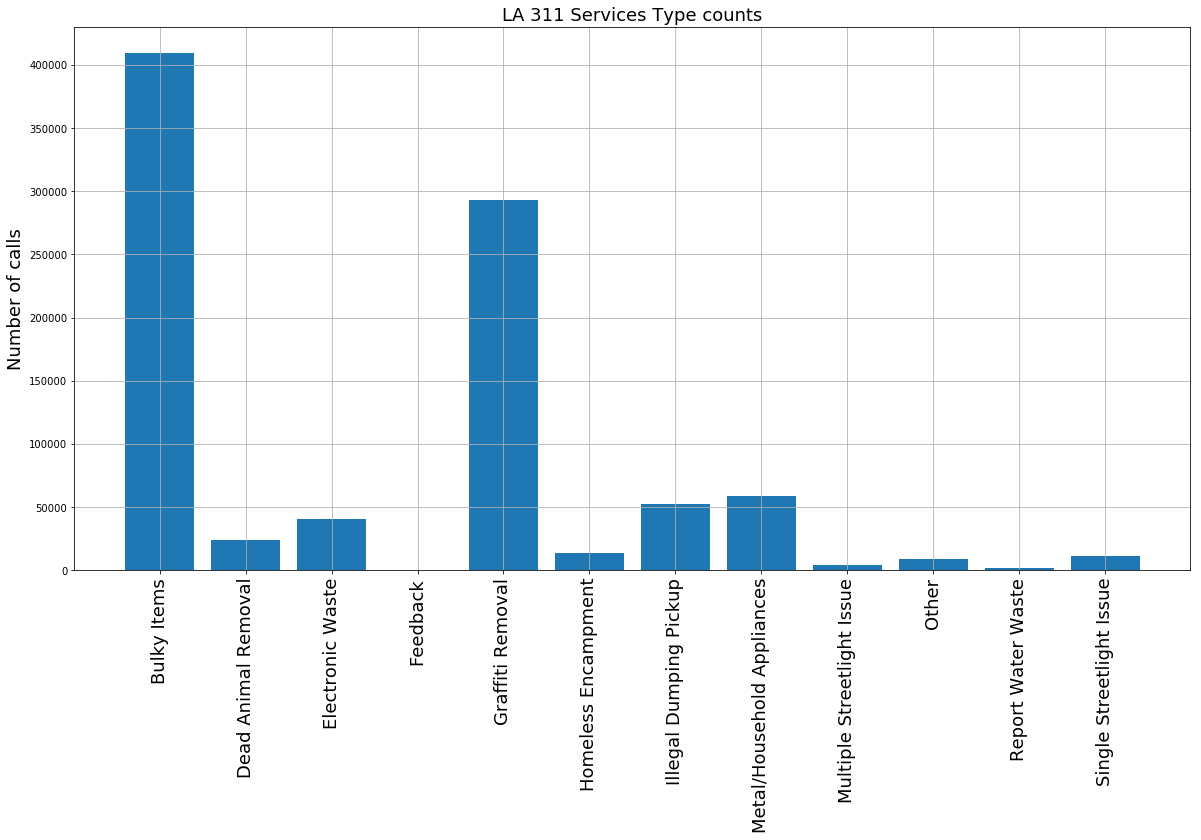

In [3]:
with open('category_count') as fi1:
    count = fi1.read()
    count = count.replace(')', '')
    count = count.replace('(', '')
out1 = open('category_count.txt','w+')
out1.write(count)
out1.close()
data1 = pd.read_csv('category_count.txt', sep='\t', header = None)
print data1

dict = {}
for d in data1[0]:
    dict[d.split(',')[0].split("'")[1]] = int(d.split(',')[1])
dict_key = sorted(dict)

service_list1 = []
count_list1 = []
for d in dict_key:
    service_list1.append(d)
    count_list1.append(dict[d])
    
plt.figure(figsize=(20,10))
plt.title('LA 311 Services Type counts',fontsize=18)
plt.xticks(range(len(count_list1)), service_list1, rotation='vertical',fontsize=18)
plt.ylabel('Number of calls', fontsize=18)
plt.bar(range(len(count_list1)),count_list1)
plt.axes().grid(True)

                                                   0
0                  'Bulky Items', 304883.98841892026
1          'Dead Animal Removal', 53264.340682458875
2              'Electronic Waste', 298253.7477413336
3                      'Feedback', 3189950.898181818
4               'Graffiti Removal', 250007.218783198
5           'Homeless Encampment', 2347428.936849711
6         'Illegal Dumping Pickup', 547380.576558136
7   'Metal/Household Appliances', 302726.44467704877
8    'Multiple Streetlight Issue', 1577717.261904762
9                         'Other', 307474.1650101649
10           'Report Water Waste', 22.05461393596987
11     'Single Streetlight Issue', 859335.2540347204
917846
3.90773086702


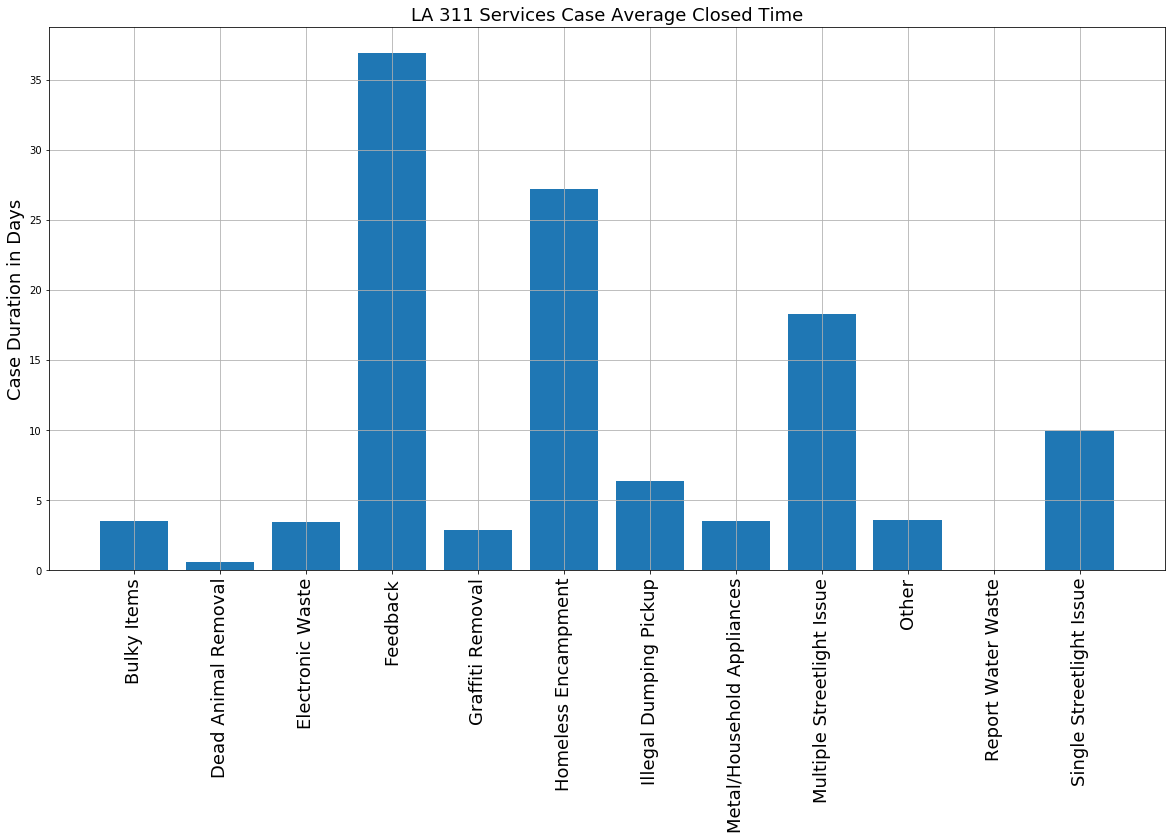

In [6]:
with open('la_data_avg_waittime') as fi2:
    t = fi2.read()
    t = t.replace(')', '')
    t = t.replace('(', '')
out2 = open('la_data_avg_waittime.txt','w+')
out2.write(t)
out2.close()
data2 = pd.read_csv('la_data_avg_waittime.txt', sep='\t', header = None)
print data2

service_list2 = []
closed_list2 = []
for d in data2[0]:
    service_list2.append(d.split(',')[0].split("'")[1])
    closed_list2.append(float(d.split(',')[1])/86400.0)

total_request = sum(count_list1)
total_time = 0
for i in range(len(service_list2)):
    total_time = count_list1[i]*closed_list2[i] + total_time

print total_request
print total_time/total_request

plt.figure(figsize=(20,10))
plt.title('LA 311 Services Case Average Closed Time',fontsize=18)
plt.xticks(range(len(closed_list2)), service_list2, rotation='vertical',fontsize=18)
plt.ylabel('Case Duration in Days', fontsize=18)
plt.bar(range(len(closed_list2)),closed_list2)
plt.axes().grid(True)